# Credit Card Fraud Challenge

### Karim Amjar, Cédric Bailly, Thomas Jalabert, Thomas Mahiout, Vincent Raybaud, Tiffanie Schreyeck

Source : https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow

#### Exploring the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard.csv") # On charge le fichier en mémoire
df.head() # affiche les 5 premières lignes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Chaque instance représente une transaction qui est consituée de 31 attributs. 
- Il y a un attribut $Time$ qui représente le moment en seconde où la transaction a été effectuée. Environ deux jours séparent la première transaction de la dernière.
- Un attribut $Amount$ qui représente le montant de la transaction.
- Un attribut $Class$ qui permet de savoir si la transaction est frauduleuse ou non.
    - 
- 28 autres attributs classé de $V1$ à $V28$

Les attributs $Vx$ ne sont pas explicitement défini par la base de donnée mais sont des éléments constitutifs de la transaction. L'information est surement caché à des fin de protections des données bancaires. De plus, un traitement supplémentaire a peut-être été effecuté ces données pour que l'on ne connaisse pas leurs vraie fonction.

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a aucune donnée manquante dans ce dataset

In [4]:
print ("Fraud:\n")

print (df.Time[df.Class == 1].describe())
print ()
print ("Normal:")
print (df.Time[df.Class == 0].describe())

Fraud:

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal:
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


Ici, on cherche à comparer les deux classes de données. Il y a peut-être une différence sur la répartition dans le temps entre une fraude et une transaction normale.
Il n'y a pas de moyen de distinger les deux classes par ce biais.
On remarque qu'il y a seulement 492 fraudes pour 284315 + 492 transactions dans cet ensemble de données.

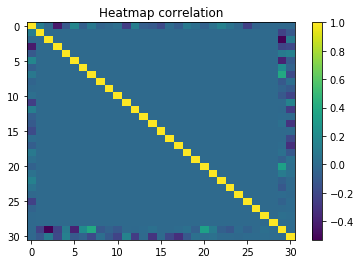

In [5]:
df_corr = df.corr()
plt.title('Heatmap correlation')
plt.imshow(df_corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()

On remarque certaines corrélations entre le temps et la durée (les éléments aux extrémités de la carte). 
Cependant la très grande majorité des attributs ne sont pas corrélés entre eux.

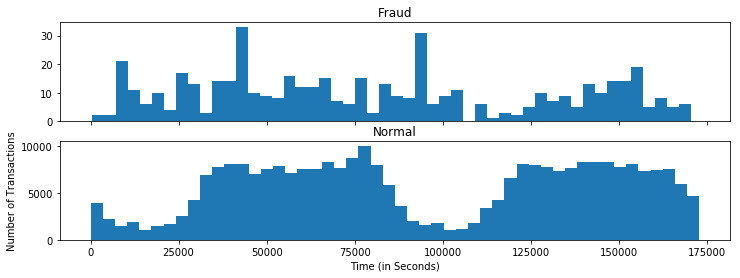

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Ici, on cherche à identifier si les transactions en fraudes se passent à des moments particuliers de la journée. Ici on voit bien que les transactions normales diminuent progressivement durant la nuit. Mais les fraudes ne sont pas atteintes par cette baisse.

> You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution.

Ici l'auteur estime que les transactions frauduleuses suivent une loi uniformément distribuée alors que les transactions normales suivent une distribution cyclique.

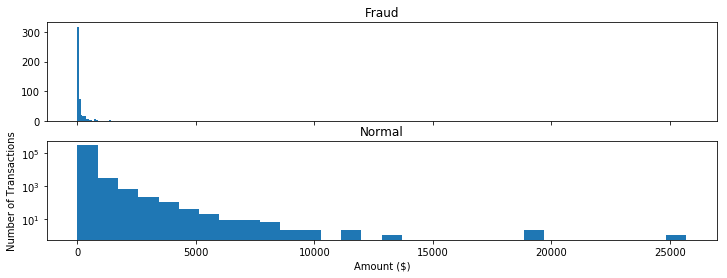

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

On execute le même travail pour la quantitée d'argent de la transaction. On remarque que les deux classes de transaction suivent la même distribution.

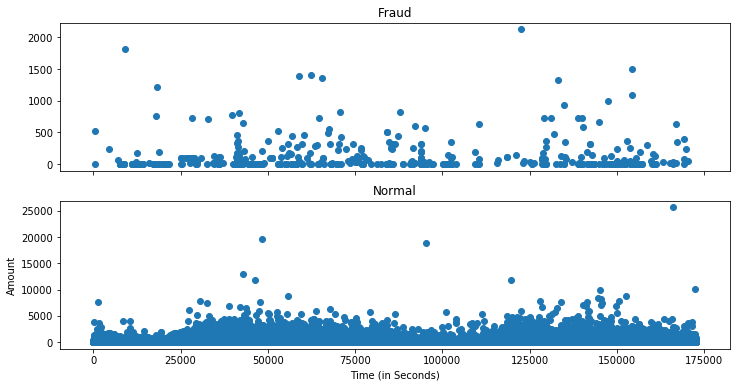

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

On affiche un autre type de graphique, mais aucune tendance n'est visible jusqu'a présent.

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



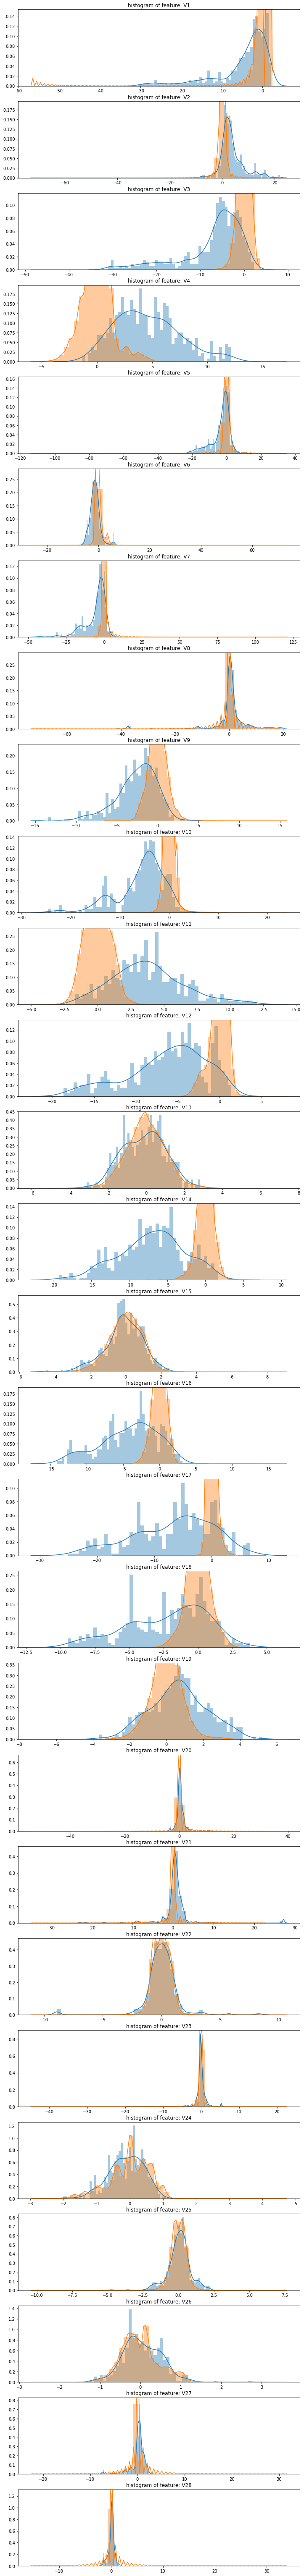

In [9]:
#Select only the anonymized features.
v_features = df.ix[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Ces graphiques sont beaucoup plus interessant. En effet, sur certains d'entre eux on distingue clairement deux distributions différentes. $V20, V19, V18, V17, V15, V13, V2, V11, V10, V5, V4, V3, V2$ permettent de distinguer une transaction frauduleuse.
Un seul de ces attributs ne permetterai pas d'identifier si la transaction est une fraude. Mais la combinaisons de chacun de ces attributs rend le travail de classification possible.